In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

conference events in last 5 years in the university of "A". this data should contains these columns: "name of event", "the place which it performs", "datetime", "duration", "number of attendance", "if the conference is international", "subject of the conference", "quality of sound systems in place", "capacity of the place", "the money that spend for that event", "any income amount if available".

In [9]:
import torch
from torch import nn


In [193]:
import Model, Engine, DataLoader

seq = 10
batch_size = 8
dataloader = DataLoader.Dataloader("TrainingData.csv", sequence_length=seq, approach="Time_series", seed=42)
train_data, val_data, test_data = dataloader.creat_dataloaders(batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_SIZE = len(train_data.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 32
NUM_LAYERS = 3
OUTPUT_SIZE = 1
EPOCHS = 500

model_name = f"Conference_V0"
experiment = f"RNN_{batch_size}"

model0 = Model.RNN_V0(INPUT_SIZE, HIDDEN_UNITS, NUM_LAYERS, OUTPUT_SIZE)

loss_fn = nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model0.parameters(), learning_rate)

model0_results, model0_true_predict = Engine.train(model=model0,
                                                   train_dataloader=train_data,
                                                   test_dataloader=val_data,
                                                   loss_fn=loss_fn,
                                                   optimizer=optimizer,
                                                   epochs=EPOCHS,
                                                   experiment_name=model_name,
                                                   model_name=experiment,
                                                   early_stop_patience=25,
                                                   device=device,
                                                   writer=False)



  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.042732 Accuracy -0.6779 | validation: Loss 0.024115 Accuracy -0.0333
Epoch 1 | train: Loss 0.035949 Accuracy -0.2729 | validation: Loss 0.025523 Accuracy 0.0766
Epoch 2 | train: Loss 0.030949 Accuracy -0.1642 | validation: Loss 0.023237 Accuracy 0.1733
Epoch 3 | train: Loss 0.026301 Accuracy -0.0060 | validation: Loss 0.024845 Accuracy 0.1621
Epoch 4 | train: Loss 0.020250 Accuracy 0.3291 | validation: Loss 0.010788 Accuracy 0.5070
Epoch 5 | train: Loss 0.012794 Accuracy 0.4248 | validation: Loss 0.006541 Accuracy 0.6302
Epoch 6 | train: Loss 0.009598 Accuracy 0.5815 | validation: Loss 0.004514 Accuracy 0.8185
Epoch 7 | train: Loss 0.006497 Accuracy 0.7399 | validation: Loss 0.003796 Accuracy 0.8166
Epoch 8 | train: Loss 0.005045 Accuracy 0.7320 | validation: Loss 0.008712 Accuracy 0.5741
Epoch 9 | train: Loss 0.005203 Accuracy 0.7815 | validation: Loss 0.003681 Accuracy 0.8489
Epoch 10 | train: Loss 0.004809 Accuracy 0.8084 | validation: Loss 0.003543 Accuracy 

In [194]:
import numpy as np
x = np.array(next(iter(test_data.dataset))[0])
dataloader.predict(model=model0, x=x, device=device, if_scale_input=False)

,Duration(hr),International,Renting(millionToman),Expenses(millionToman),count,Sound_System_quality,Capacity,Number_of_Attendance
0,0.216549,0.0,0.408122,0.409827,0.609756,0.456432,0.402386,203.740952


In [195]:
import Model, Engine, DataLoader

seq = 10
batch_size = 8
dataloader = DataLoader.Dataloader("TrainingData.csv", sequence_length=seq, approach="Time_series", seed=42)
train_data, val_data, test_data = dataloader.creat_dataloaders(batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_SIZE = len(train_data.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 32
NUM_LAYERS = 3
OUTPUT_SIZE = 1
EPOCHS = 500

model_name = f"Conference_V0"
experiment = f"GRU_{batch_size}"

model1 = Model.GRU_V0(INPUT_SIZE, HIDDEN_UNITS, NUM_LAYERS, OUTPUT_SIZE)

loss_fn = nn.MSELoss()
learning_rate = 0.03
optimizer = torch.optim.SGD(model1.parameters(), learning_rate)

model1_results, model1_true_predict = Engine.train(model=model1,
                                                   train_dataloader=train_data,
                                                   test_dataloader=val_data,
                                                   loss_fn=loss_fn,
                                                   optimizer=optimizer,
                                                   epochs=EPOCHS,
                                                   experiment_name=model_name,
                                                   model_name=experiment,
                                                   early_stop_patience=25,
                                                   device=device,
                                                   writer=False)



  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.061769 Accuracy -1.1010 | validation: Loss 0.027318 Accuracy -0.1246
Epoch 1 | train: Loss 0.035432 Accuracy -0.2150 | validation: Loss 0.028271 Accuracy -0.0640
Epoch 2 | train: Loss 0.035005 Accuracy -0.3678 | validation: Loss 0.027313 Accuracy 0.0113
Epoch 3 | train: Loss 0.033577 Accuracy -0.1910 | validation: Loss 0.024281 Accuracy 0.0079
Epoch 4 | train: Loss 0.034959 Accuracy -0.2231 | validation: Loss 0.030470 Accuracy -0.0981
Epoch 5 | train: Loss 0.034968 Accuracy -0.2070 | validation: Loss 0.026285 Accuracy 0.0075
Epoch 6 | train: Loss 0.034547 Accuracy -0.3066 | validation: Loss 0.027080 Accuracy -0.1479
Epoch 7 | train: Loss 0.033893 Accuracy -0.2183 | validation: Loss 0.028024 Accuracy -0.0155
Epoch 8 | train: Loss 0.034792 Accuracy -0.2408 | validation: Loss 0.025071 Accuracy -0.1960
Epoch 9 | train: Loss 0.034323 Accuracy -0.1286 | validation: Loss 0.026872 Accuracy -0.0045
Epoch 10 | train: Loss 0.033015 Accuracy -0.2017 | validation: Loss 0.026

In [196]:
import Model, Engine, DataLoader

seq = 10
batch_size = 8
dataloader = DataLoader.Dataloader("TrainingData.csv", sequence_length=seq, approach="Time_series", seed=42)
train_data, val_data, test_data = dataloader.creat_dataloaders(batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_SIZE = len(train_data.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 32
NUM_LAYERS = 3
OUTPUT_SIZE = 1
EPOCHS = 500

model_name = f"Conference_V0"
experiment = f"LSTM_{batch_size}"

model2 = Model.LSTM_V0(INPUT_SIZE, HIDDEN_UNITS, NUM_LAYERS, OUTPUT_SIZE)

loss_fn = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model2.parameters(), learning_rate)

model2_results, model2_true_predict = Engine.train(model=model2,
                                                   train_dataloader=train_data,
                                                   test_dataloader=val_data,
                                                   loss_fn=loss_fn,
                                                   optimizer=optimizer,
                                                   epochs=EPOCHS,
                                                   experiment_name=model_name,
                                                   model_name=experiment,
                                                   early_stop_patience=25,
                                                   device=device,
                                                   writer=False)



  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.047895 Accuracy -0.7621 | validation: Loss 0.032858 Accuracy -0.2821
Epoch 1 | train: Loss 0.037202 Accuracy -0.3571 | validation: Loss 0.028459 Accuracy -0.2280
Epoch 2 | train: Loss 0.035182 Accuracy -0.2124 | validation: Loss 0.032984 Accuracy -0.2458
Epoch 3 | train: Loss 0.027388 Accuracy -0.0424 | validation: Loss 0.016638 Accuracy 0.0975
Epoch 4 | train: Loss 0.006870 Accuracy 0.7043 | validation: Loss 0.003606 Accuracy 0.8391
Epoch 5 | train: Loss 0.005260 Accuracy 0.7965 | validation: Loss 0.004246 Accuracy 0.7939
Epoch 6 | train: Loss 0.003997 Accuracy 0.8455 | validation: Loss 0.002952 Accuracy 0.8443
Epoch 7 | train: Loss 0.003394 Accuracy 0.8636 | validation: Loss 0.005492 Accuracy 0.7405
Epoch 8 | train: Loss 0.003183 Accuracy 0.8726 | validation: Loss 0.003135 Accuracy 0.8912
Epoch 9 | train: Loss 0.002865 Accuracy 0.8870 | validation: Loss 0.003306 Accuracy 0.8838
Epoch 10 | train: Loss 0.003317 Accuracy 0.8339 | validation: Loss 0.002896 Accurac

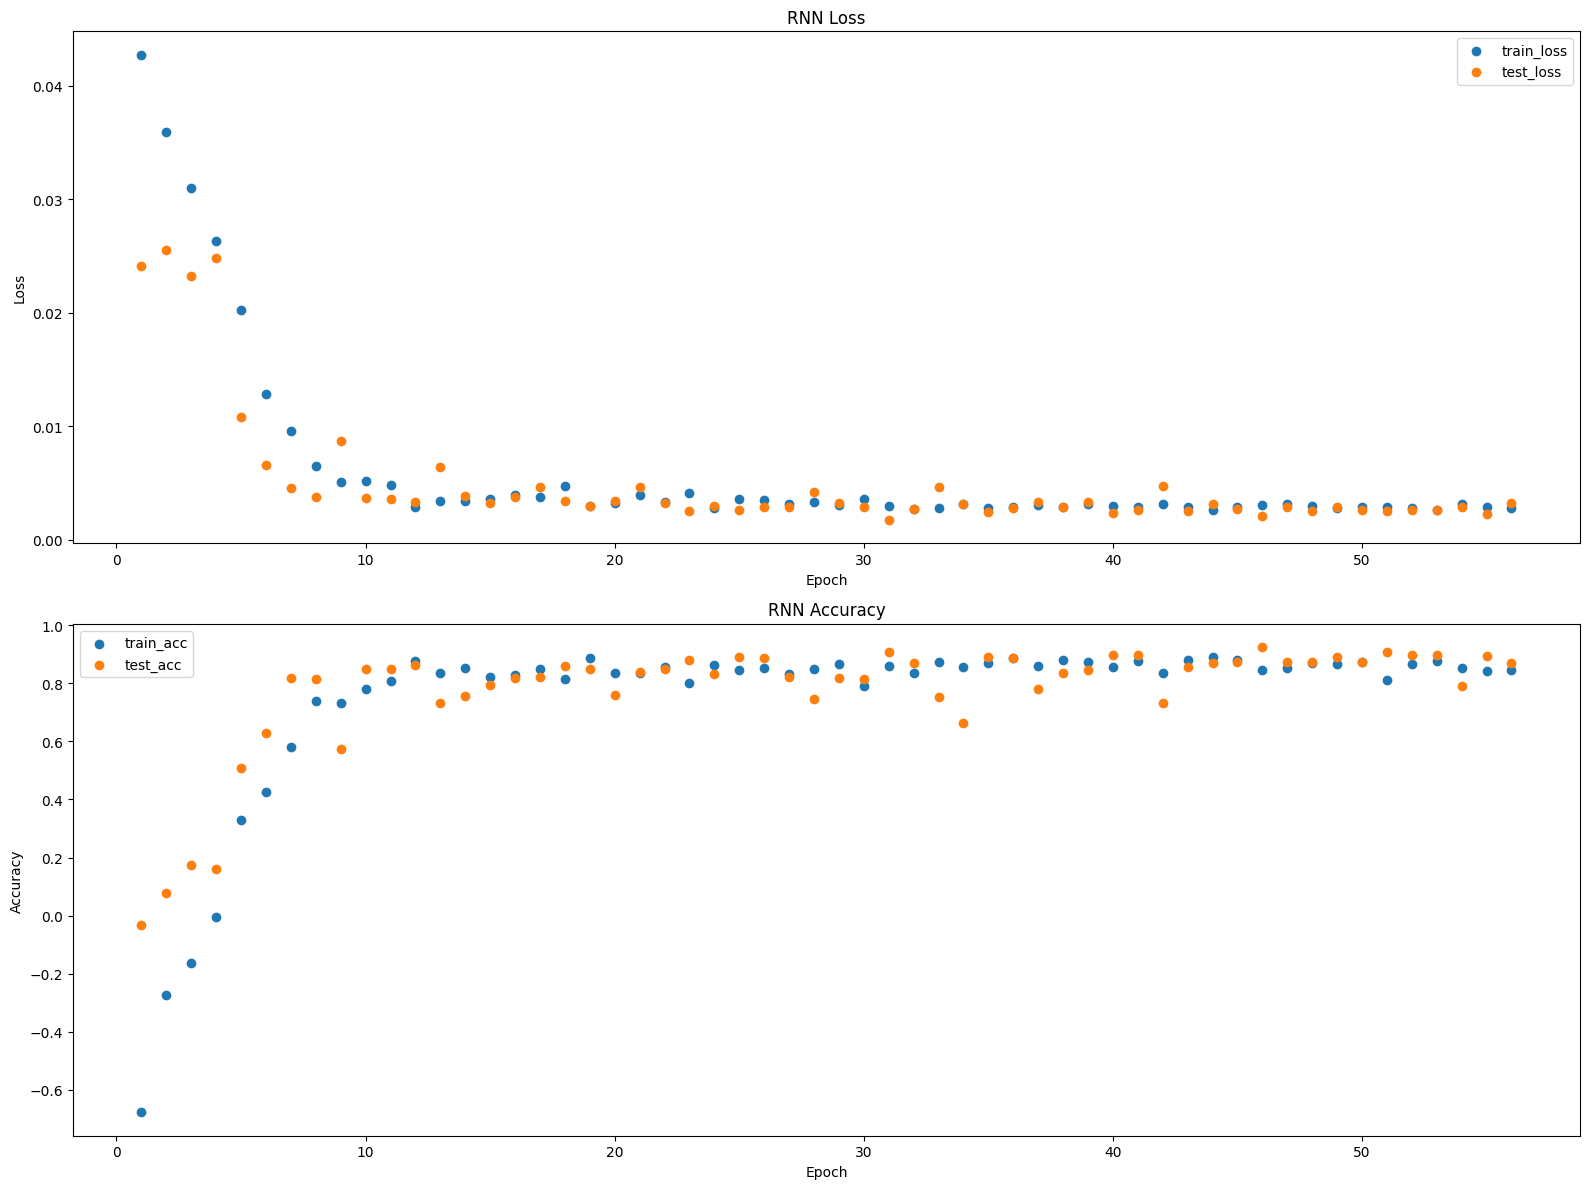

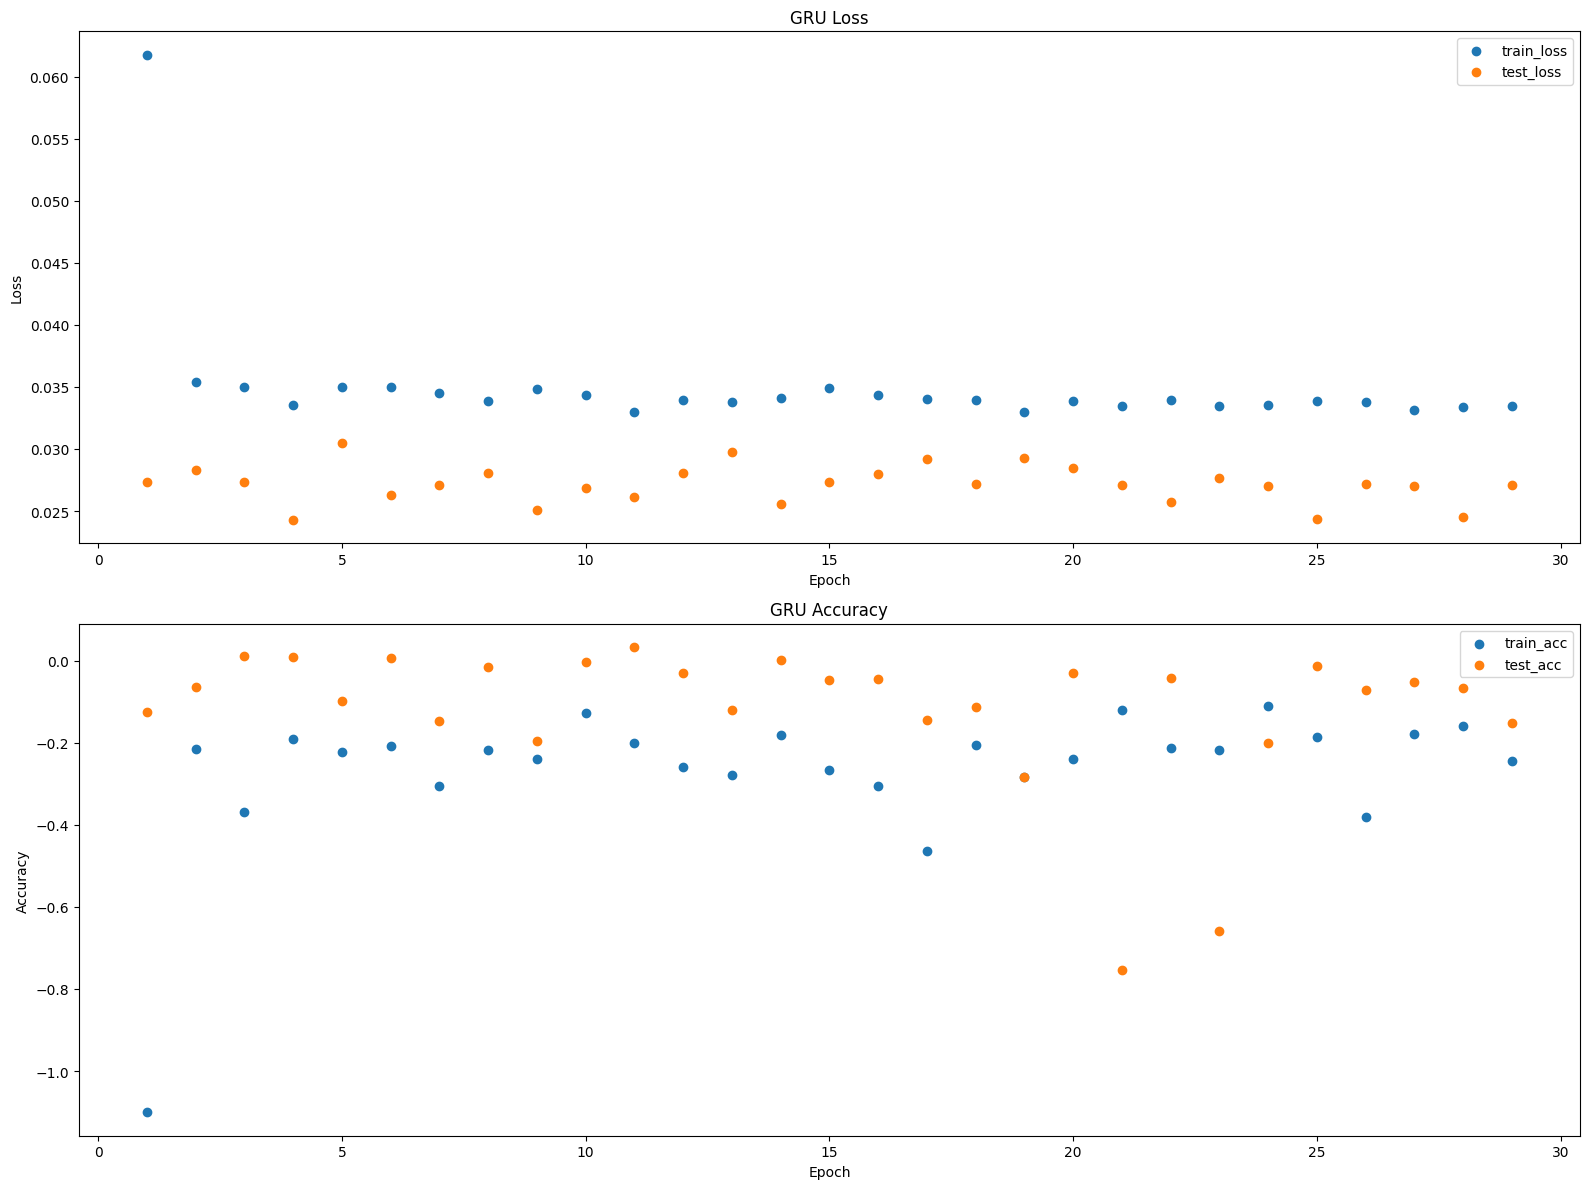

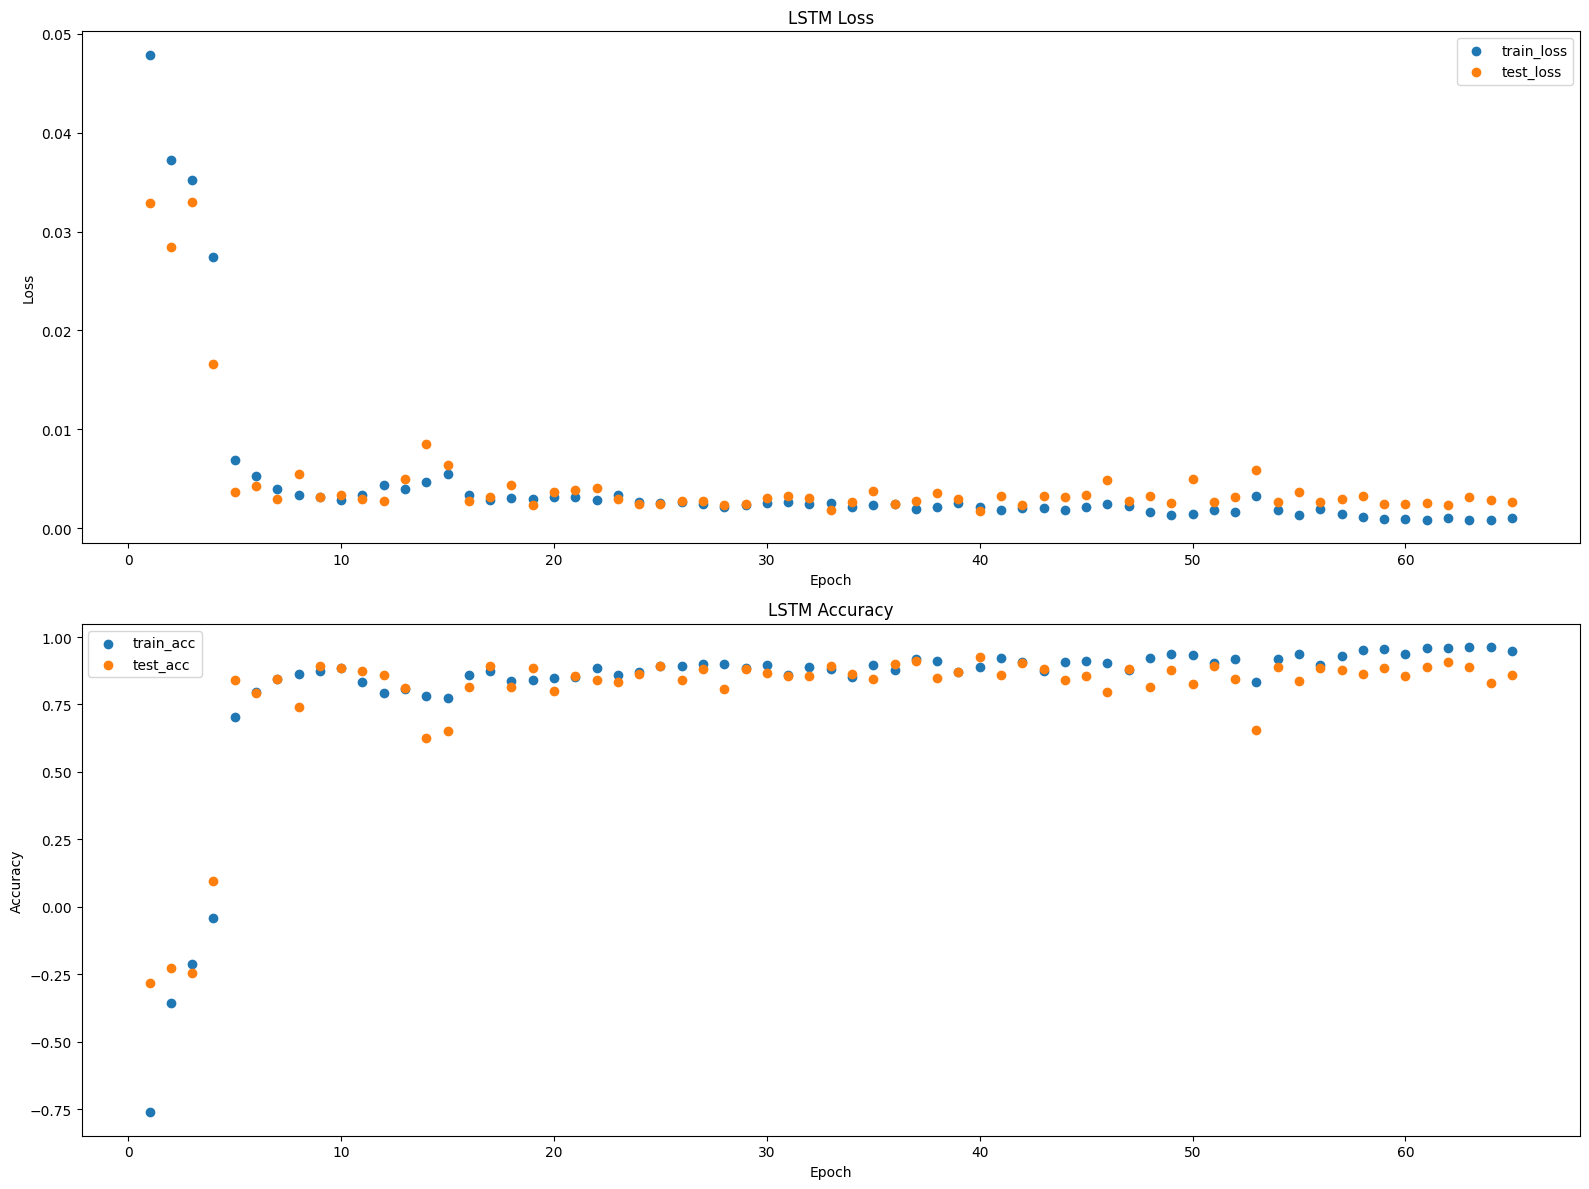

In [197]:
import Utils

Utils.plot(model0_results, "RNN")
Utils.plot(model1_results, "GRU")
Utils.plot(model2_results, "LSTM")

In [199]:
import Model, Engine, DataLoader

seq = 10
batch_size = 8
dataloader = DataLoader.Dataloader("TrainingData.csv", sequence_length=seq, approach="CNN", seed=42)
train_data, val_data, test_data = dataloader.creat_dataloaders(batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_SIZE = 7  # number of features
HIDDEN_UNITS = 32
NUM_LAYERS = 3
OUTPUT_SIZE = 1
EPOCHS = 500

model_name = f"Conference_V0"
experiment = f"NN_{batch_size}"

model3 = Model.CNN_V0(INPUT_SIZE, HIDDEN_UNITS, OUTPUT_SIZE)

loss_fn = nn.MSELoss()
learning_rate = 0.05
optimizer = torch.optim.Adam(model3.parameters(), learning_rate)

model3_results, model3_true_predict = Engine.train(model=model3,
                                                   train_dataloader=train_data,
                                                   test_dataloader=val_data,
                                                   loss_fn=loss_fn,
                                                   optimizer=optimizer,
                                                   epochs=EPOCHS,
                                                   experiment_name=model_name,
                                                   model_name=experiment,
                                                   early_stop_patience=25,
                                                   device=device,
                                                   writer=False)



  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.043366 Accuracy -0.3346 | validation: Loss 0.004228 Accuracy 0.8542
Epoch 1 | train: Loss 0.003847 Accuracy 0.8420 | validation: Loss 0.003477 Accuracy 0.8633
Epoch 2 | train: Loss 0.003416 Accuracy 0.8371 | validation: Loss 0.002976 Accuracy 0.9077
Epoch 3 | train: Loss 0.003769 Accuracy 0.8499 | validation: Loss 0.002944 Accuracy 0.8808
Epoch 4 | train: Loss 0.003126 Accuracy 0.8594 | validation: Loss 0.005509 Accuracy 0.7540
Epoch 5 | train: Loss 0.003148 Accuracy 0.8587 | validation: Loss 0.003003 Accuracy 0.8739
Epoch 6 | train: Loss 0.003419 Accuracy 0.8399 | validation: Loss 0.002732 Accuracy 0.8330
Epoch 7 | train: Loss 0.003790 Accuracy 0.8503 | validation: Loss 0.003417 Accuracy 0.8099
Epoch 8 | train: Loss 0.003318 Accuracy 0.8449 | validation: Loss 0.003548 Accuracy 0.8555
Epoch 9 | train: Loss 0.005893 Accuracy 0.7691 | validation: Loss 0.007008 Accuracy 0.5512
Epoch 10 | train: Loss 0.003174 Accuracy 0.8518 | validation: Loss 0.002738 Accuracy 0.86

In [205]:
max(model0_results["test_acc"]), max(model1_results["test_acc"]), max(model2_results["test_acc"]), max(model3_results["test_acc"])

(0.9248318456051772,
 0.03287985699328899,
 0.9264062382432466,
 0.9091726053161653)